In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)             
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
file_path='C:\\Users\\abhin\\Downloads\\test_8i3B3FC.csv'
ts=pd.read_csv(file_path)
ts

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0
...,...,...,...,...,...,...
141443,47187,j,4681.0,4.0,152060,2469.0
141444,329126,j,7782.0,3.0,89235,18998.0
141445,282334,p,435.0,5.0,119788,57048.0
141446,386629,o,176.0,3.0,86824,10193.0


In [3]:
ts.shape

(141448, 6)

In [4]:
ts.size

848688

In [5]:
ts.dtypes

ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
dtype: object

In [6]:
ts.values

array([[366953, 'a', 5645.0, 3.0, 50652, 33200.0],
       [71864, 'c', 24511.0, 6.0, 37685, 2730.0],
       [141692, 'i', 927.0, 1.0, 135293, 21167.0],
       ...,
       [282334, 'p', 435.0, 5.0, 119788, 57048.0],
       [386629, 'o', 176.0, 3.0, 86824, 10193.0],
       [107271, 'a', 648.0, 2.0, 102240, 12785.0]], dtype=object)

In [7]:
ts.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

In [8]:
df=ts['ID']
df

0         366953
1          71864
2         141692
3         316833
4         440445
           ...  
141443     47187
141444    329126
141445    282334
141446    386629
141447    107271
Name: ID, Length: 141448, dtype: int64

In [9]:
col=['ID','Tag']
ts.drop(col,axis=1,inplace=True)

In [10]:
num=ts.select_dtypes(include=['number']).columns
cat=ts.select_dtypes(include=['object', 'category']).columns
print('Cat:',cat)
print('num:',num)

Cat: Index([], dtype='object')
num: Index(['Reputation', 'Answers', 'Username', 'Views'], dtype='object')


In [11]:
for i in num:
    d_count=round(ts[i].count(),2)
    d_max=round(ts[i].max(),2)
    d_min=round(ts[i].min(),2)
    d_mean=round(ts[i].mean(),2)
    d_median=round(ts[i].median(),2)
    d_std=round(ts[i].std(),2)
    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

Reputation count: 141448
Reputation max: 1042428.0
Reputation min: 0.0
Reputation mean: 7920.93
Reputation median: 1245.0
Reputation std: 27910.72
------------------------------------
Answers count: 141448
Answers max: 73.0
Answers min: 0.0
Answers mean: 3.91
Answers median: 3.0
Answers std: 3.58
------------------------------------
Username count: 141448
Username max: 175737
Username min: 4
Username mean: 81348.23
Username median: 78795.5
Username std: 49046.1
------------------------------------
Views count: 141448
Views max: 5004669.0
Views min: 9.0
Views mean: 29846.33
Views median: 8977.0
Views std: 80343.74
------------------------------------


In [12]:
for i in num:
    q1=np.quantile(ts[i],0.25)
    q2=np.quantile(ts[i],0.50)
    q3=np.quantile(ts[i],0.75)
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',3)
    print('------------')

Reputation q1: 286.0
Reputation q2: 1245.0
Reputation q3: 3
------------
Answers q1: 2.0
Answers q2: 3.0
Answers q3: 3
------------
Username q1: 40222.75
Username q2: 78795.5
Username q3: 3
------------
Views q1: 2608.0
Views q2: 8977.0
Views q3: 3
------------


In [13]:
ts.describe()

,Reputation,Answers,Username,Views
count,1.414480e+05,141448.000000,141448.000000,1.414480e+05
mean,7.920927e+03,3.914873,81348.231117,2.984633e+04
std,2.791072e+04,3.577460,49046.098215,8.034374e+04
min,0.000000e+00,0.000000,4.000000,9.000000e+00
25%,2.860000e+02,2.000000,40222.750000,2.608000e+03
50%,1.245000e+03,3.000000,78795.500000,8.977000e+03
75%,5.123000e+03,5.000000,122149.000000,2.698925e+04
max,1.042428e+06,73.000000,175737.000000,5.004669e+06


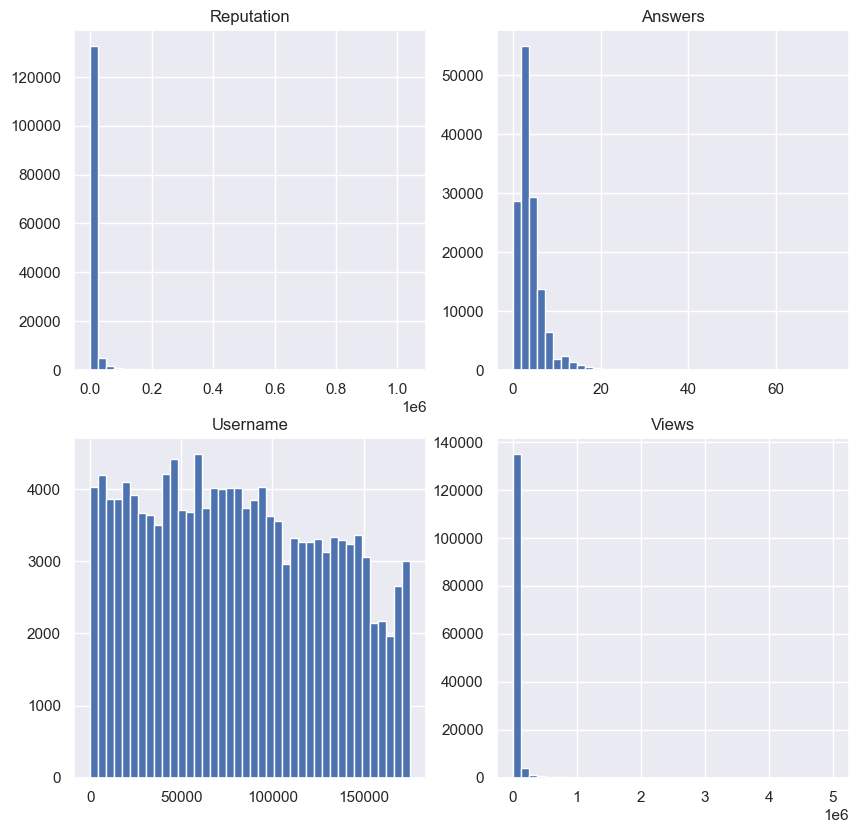

In [14]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.hist(ts[column],bins=40)
plt.show()    

In [15]:
for i in (num):
    print(i,ts[i].skew())

Reputation 11.318535544194582
Answers 3.3980912343127145
Username 0.14744775131758642
Views 13.532848265572564


In [16]:
num

Index(['Reputation', 'Answers', 'Username', 'Views'], dtype='object')

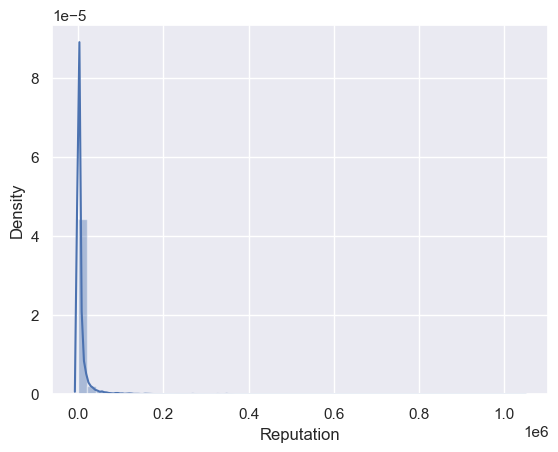

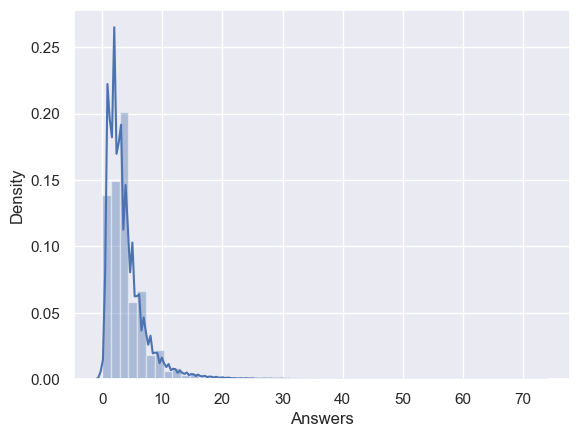

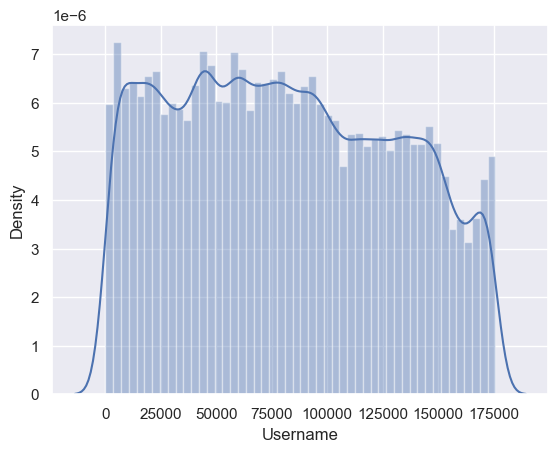

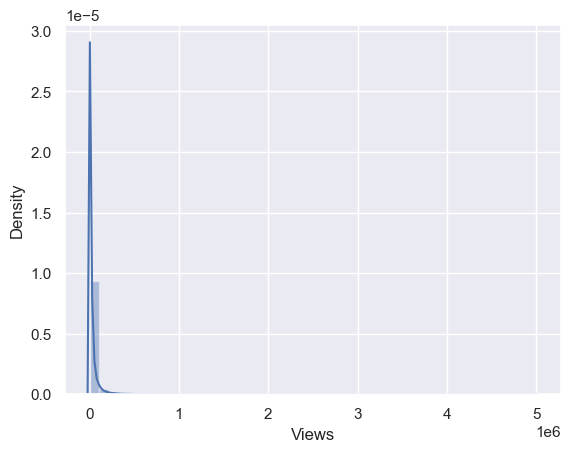

In [17]:
for i in num:
    sns.distplot(ts[i])
    plt.show()

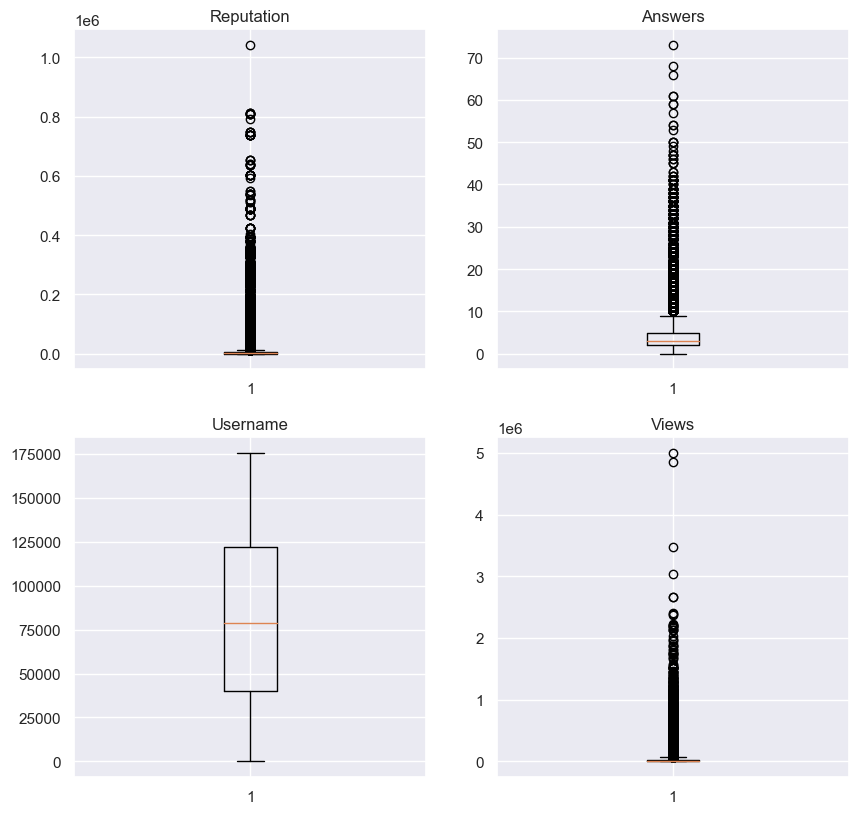

In [18]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(ts[column])
plt.show()

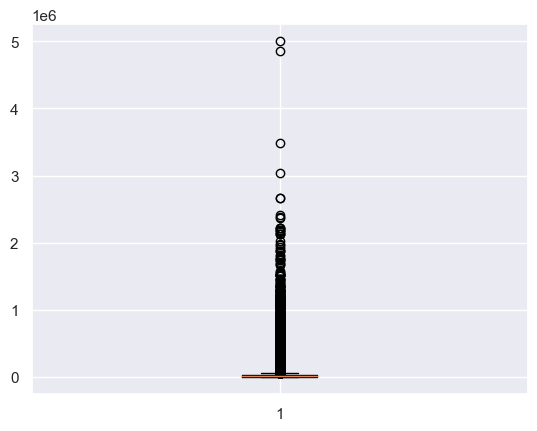

In [19]:
plt.boxplot(ts['Views'])
plt.show()

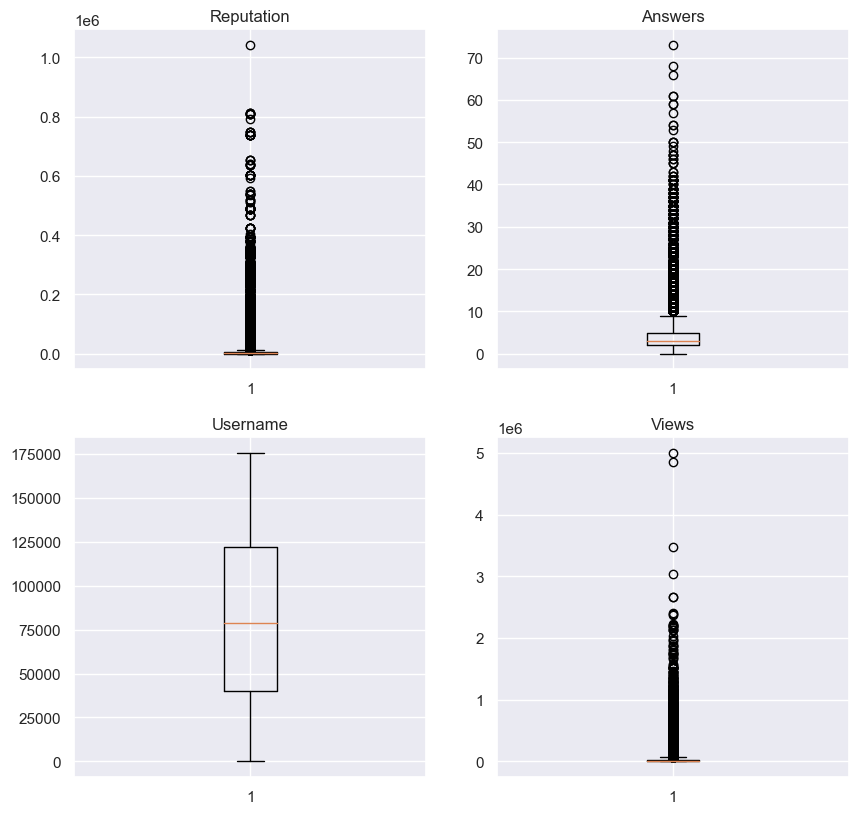

In [20]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(ts[column])
plt.show()

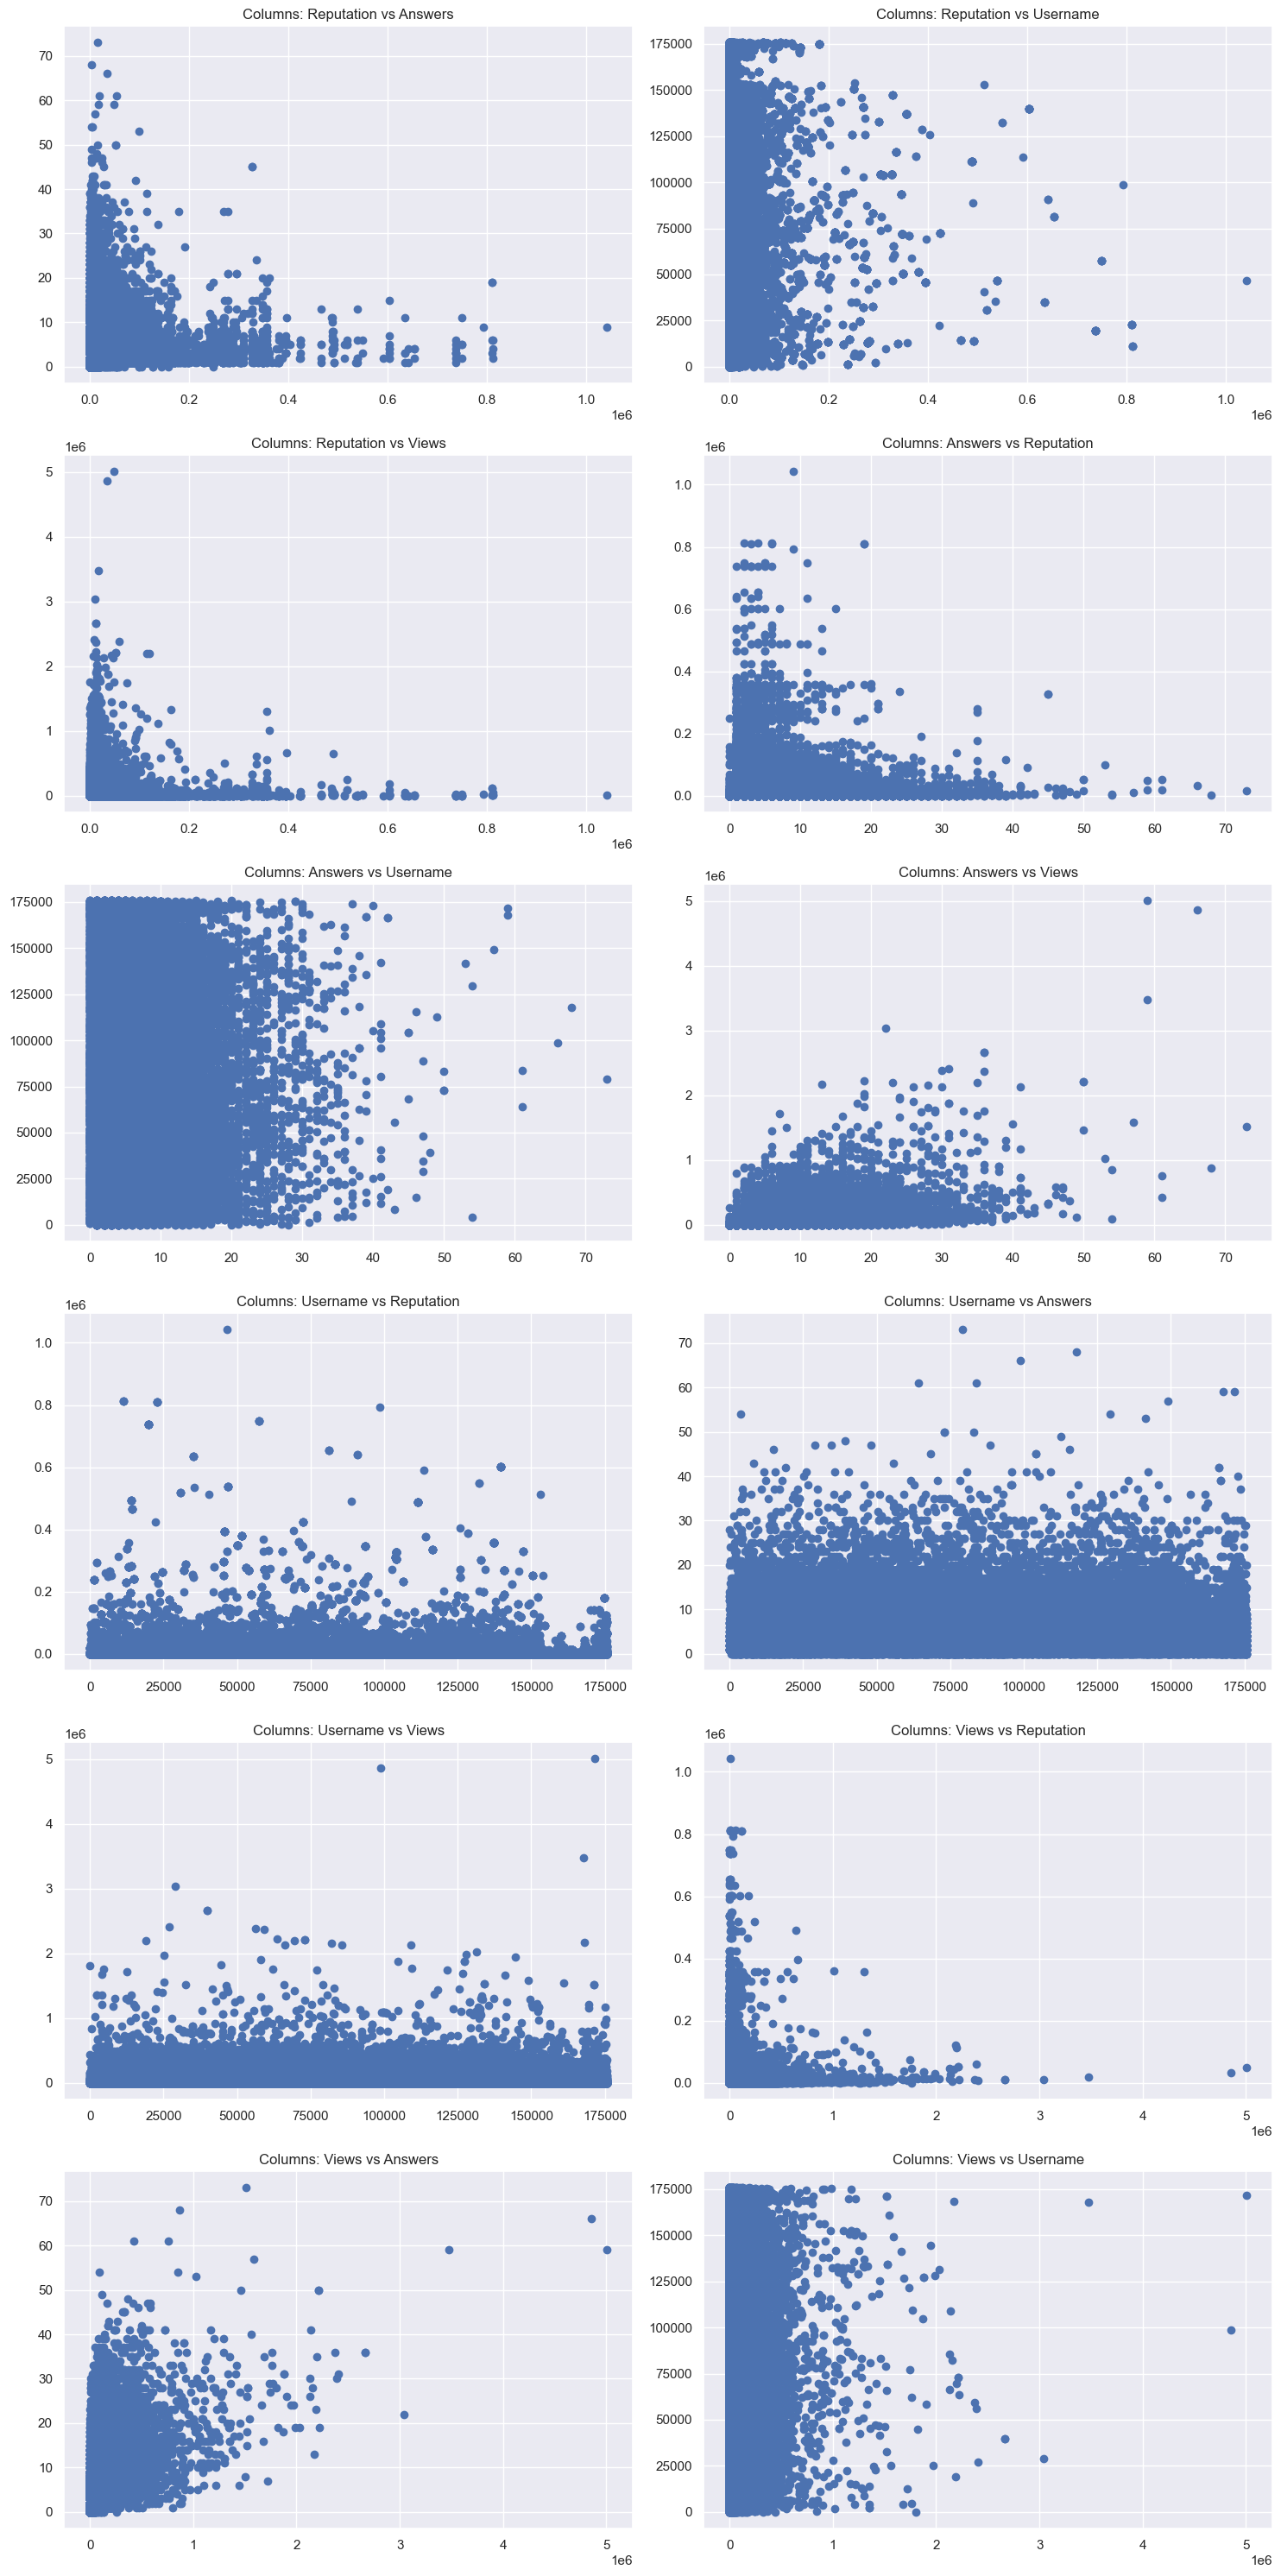

In [21]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 6 * 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(6, 2, figsize=(15, 30))  # 5 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in num:
    for j in num:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 2, plot_counter % 2]  # Get the current subplot
            ax.scatter(ts[i], ts[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [22]:
corr=ts.corr(numeric_only=True)
corr

,Reputation,Answers,Username,Views
Reputation,1.000000,0.072639,-0.041645,0.038193
Answers,0.072639,1.000000,-0.014374,0.517076
Username,-0.041645,-0.014374,1.000000,0.000856
Views,0.038193,0.517076,0.000856,1.000000


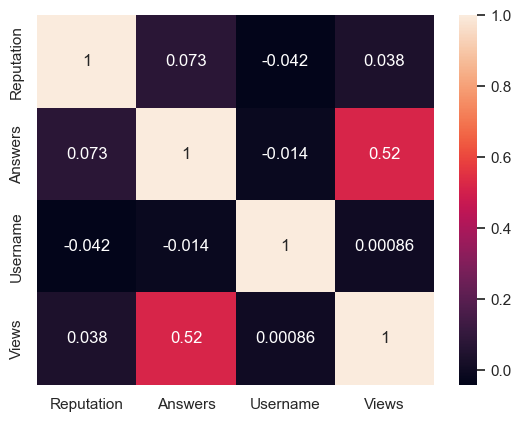

In [23]:
sns.heatmap(corr,annot=True)
plt.show()

In [24]:
ts

,Reputation,Answers,Username,Views
0,5645.0,3.0,50652,33200.0
1,24511.0,6.0,37685,2730.0
2,927.0,1.0,135293,21167.0
3,21.0,6.0,166998,18528.0
4,4475.0,10.0,53504,57240.0
...,...,...,...,...
141443,4681.0,4.0,152060,2469.0
141444,7782.0,3.0,89235,18998.0
141445,435.0,5.0,119788,57048.0
141446,176.0,3.0,86824,10193.0


In [46]:
import pickle
lr=pickle.load(open("UPvotes_prediction","rb"))

In [47]:
y_pred=lr.predict(ts)

In [48]:
pred_df=pd.DataFrame(y_pred,columns=['Upvotes'])
pred_df

,Upvotes
0,385.266116
1,265.602321
2,46.740655
3,-247.006455
4,552.051115
...,...
141443,-336.557437
141444,157.227988
141445,603.118755
141446,-271.730223


In [49]:
b=pd.concat([df,pred_df],axis=1)

In [50]:
b

,ID,Upvotes
0,366953,385.266116
1,71864,265.602321
2,141692,46.740655
3,316833,-247.006455
4,440445,552.051115
...,...,...
141443,47187,-336.557437
141444,329126,157.227988
141445,282334,603.118755
141446,386629,-271.730223


In [51]:
b=b.set_index('ID')
b

,Upvotes
ID,
366953,385.266116
71864,265.602321
141692,46.740655
316833,-247.006455
440445,552.051115
...,...
47187,-336.557437
329126,157.227988
282334,603.118755


In [52]:
b.to_csv("UPvotes_prediction_lr.csv")